# 1. Понимание бизнеса

## 1.1 Цель
Предсказать качество вина

## 1.2 Описание
Определить качество вина на основании его физических переменных

[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Import Libraries

In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebraa
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [62]:
## Libraries
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# For clustering
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

# Data preprocessing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Madhine learning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

# Evaluation library
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

## 2.3 Загрузка данных

In [65]:
df = pd.read_csv("winequalityN.csv", header=0)

## 2.4 Статистика и визуализации

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Описание переменных**
 - fixed acidity - фиксированная кислотность
 - volatile acidity - летучая кислотность
 - citric acid - лимонная кислота
 - residual sugar - сахар
 - chlorides - хлориды
 - free sulfur dioxide - свободный диоксид серы
 - total sulfur dioxide - общий диоксид серы
 - density - плотность
 - pH - рН
 - sulphates - сульфаты
 - alcohol - спирт
 - quality (score between 0 and 10) - качество (итоговая метрика)

### 2.4.1 Кключевая информация о переменных

In [6]:
# Data size
print("Data size:{}".format(df.shape))

Data size:(6497, 13)


In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
# "type" values
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [29]:
# Overview, Basic features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
df.dropna(inplace=True)
df.shape

(6463, 13)

Text(0.5, 1.0, 'Wine type')

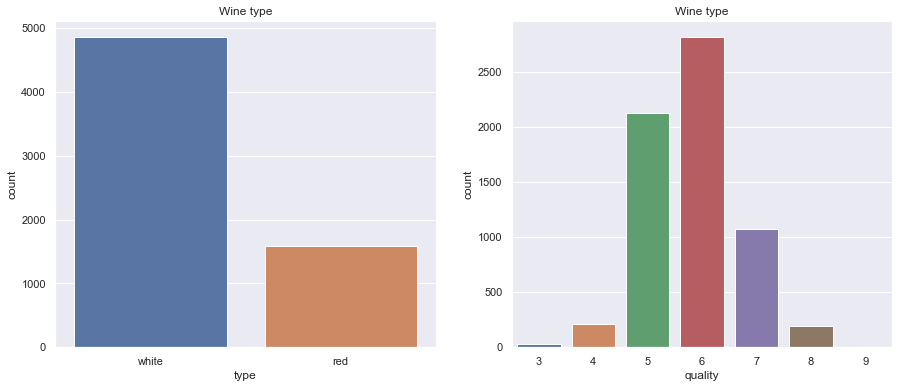

In [11]:
# Wine type and Wine quality data count
fig, ax = plt.subplots(1,2,figsize=(15,6))

# Wine type
sns.countplot(df["type"], ax=ax[0])
ax[0].set_title("Wine type")

# Wine quality
sns.countplot(df["quality"], ax=ax[1])
ax[1].set_title("Wine type")

### 2.4.2 Распределения по типам

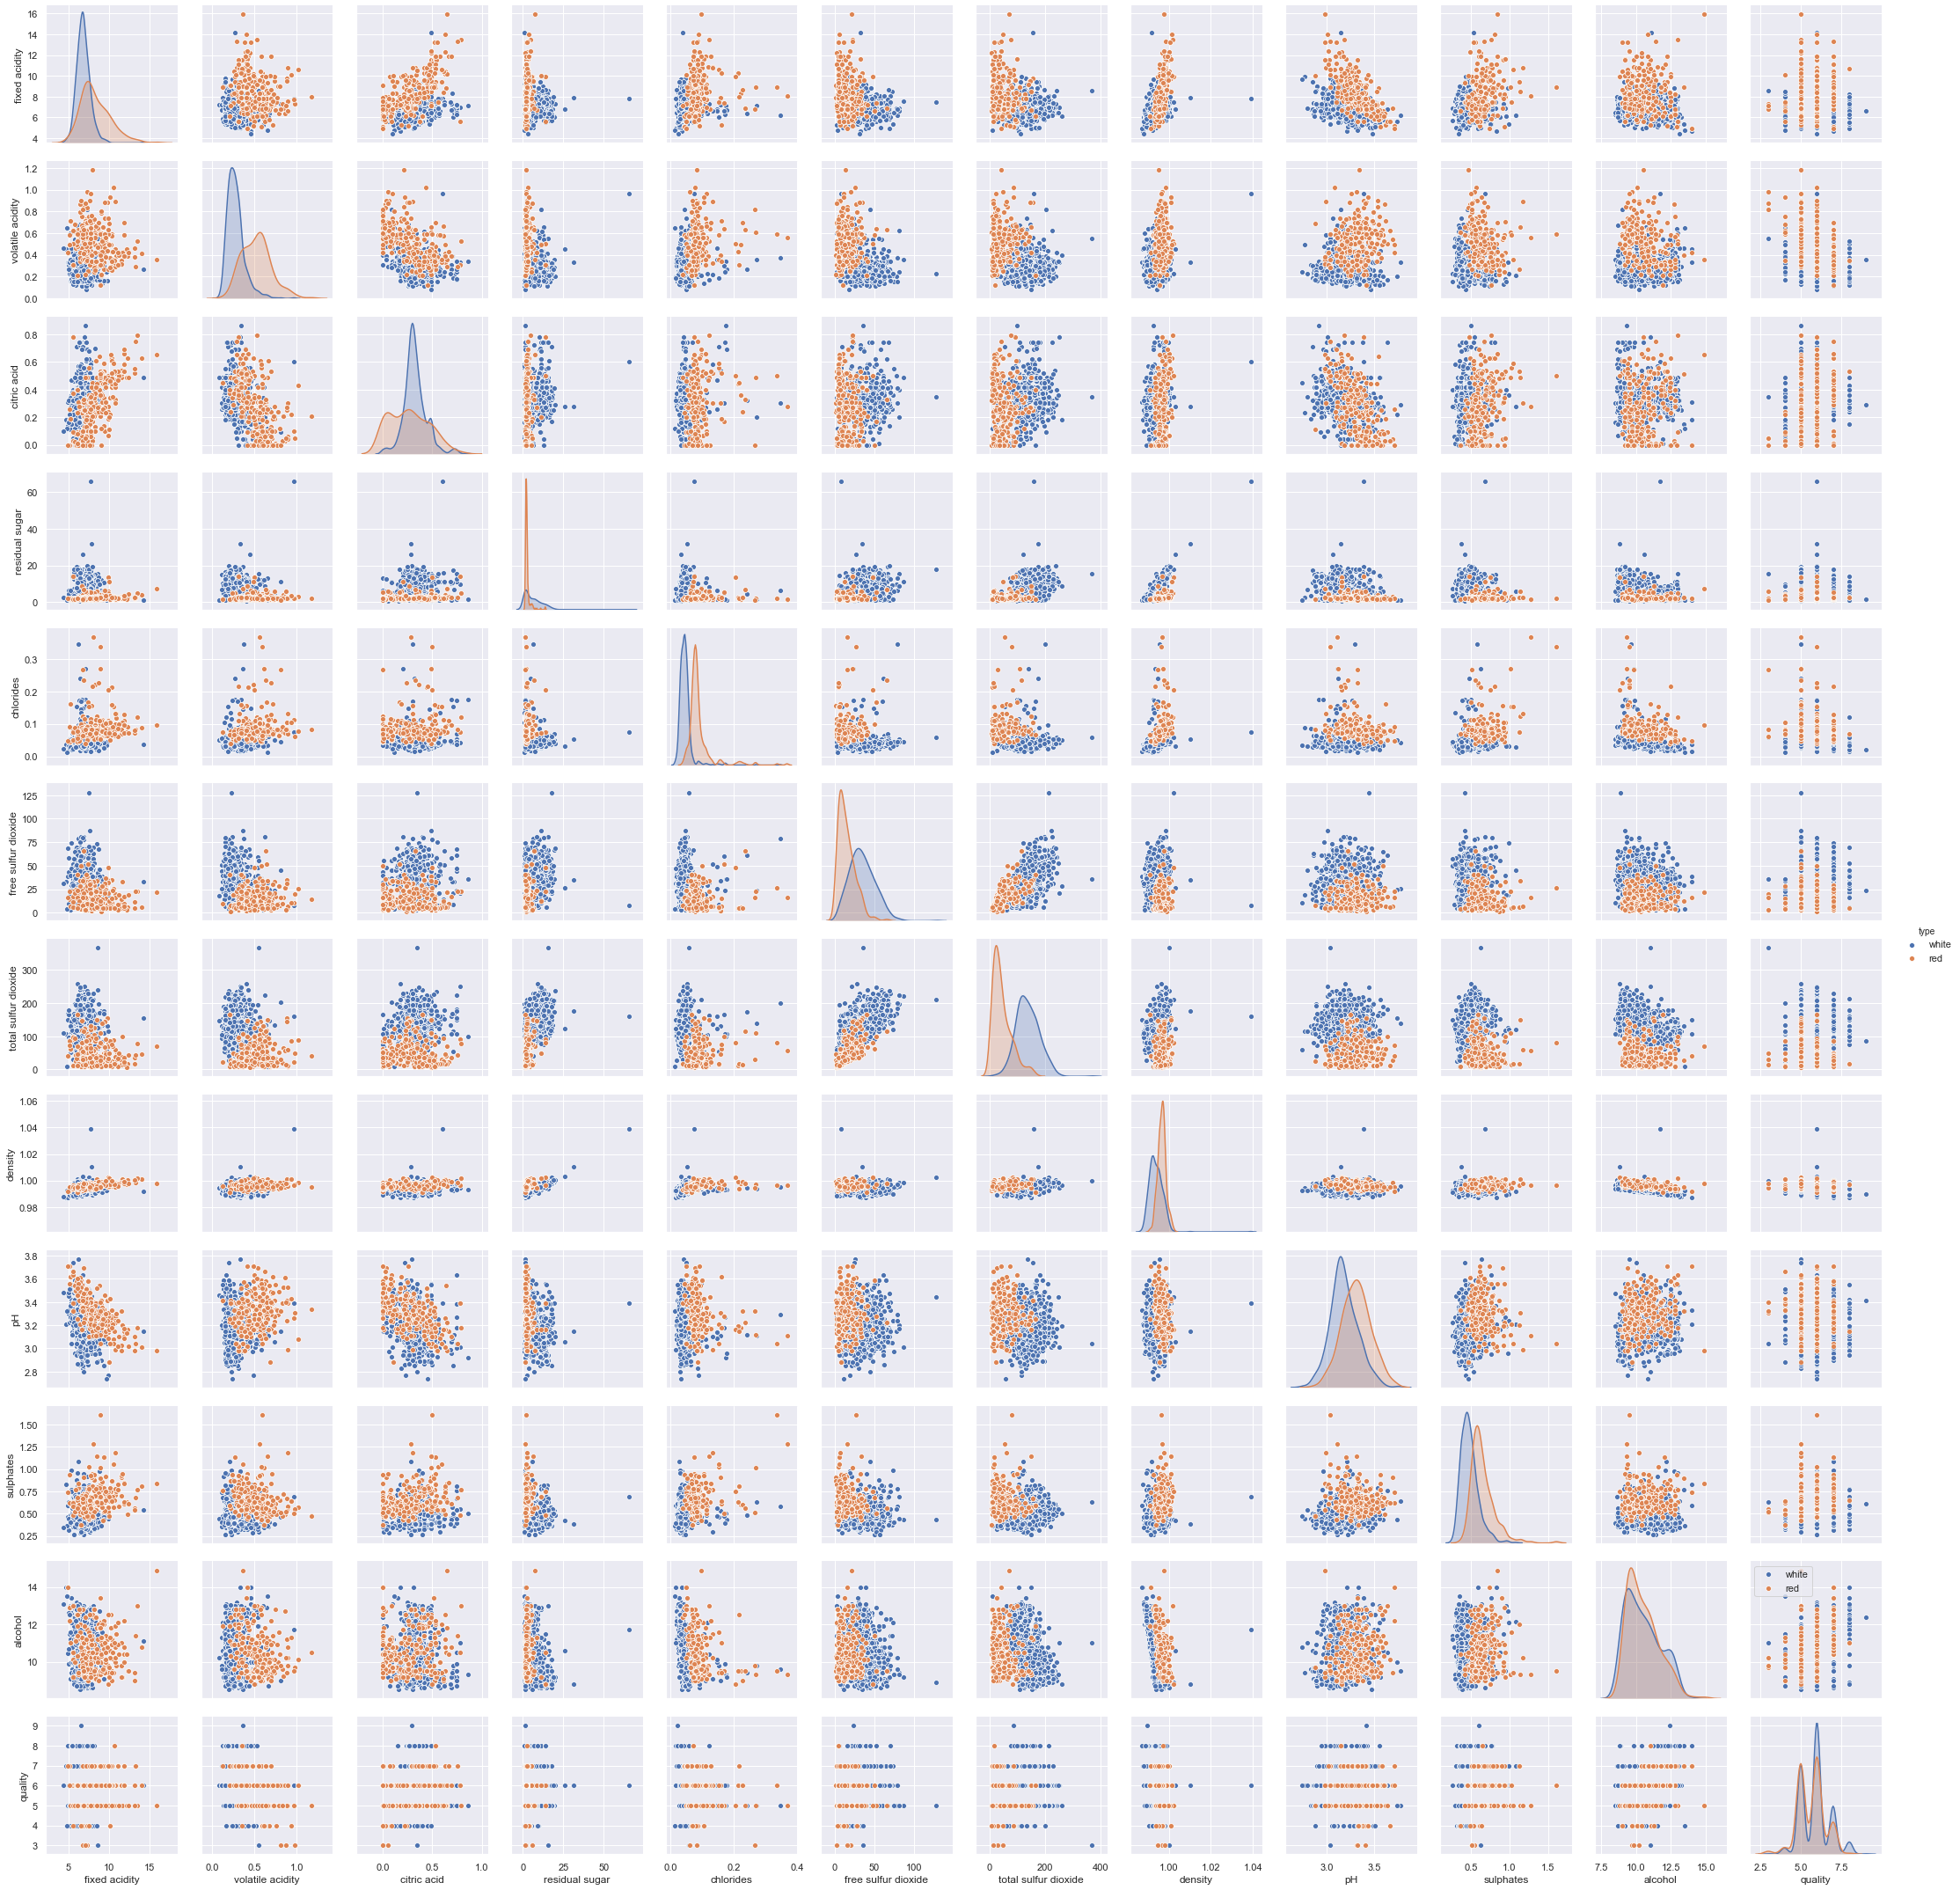

In [12]:
# Each wine type, plotting check of whole data, sample=1000.
sns.pairplot(df.sample(n=1000, random_state=10), hue="type", hue_order=['white', 'red'])
plt.legend()

 - Распределение типа «белый» или «красный» разное
 - Может потребовать 2 модели - отдельно для красного и белого

### 2.4.3 Распределения по качеству

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


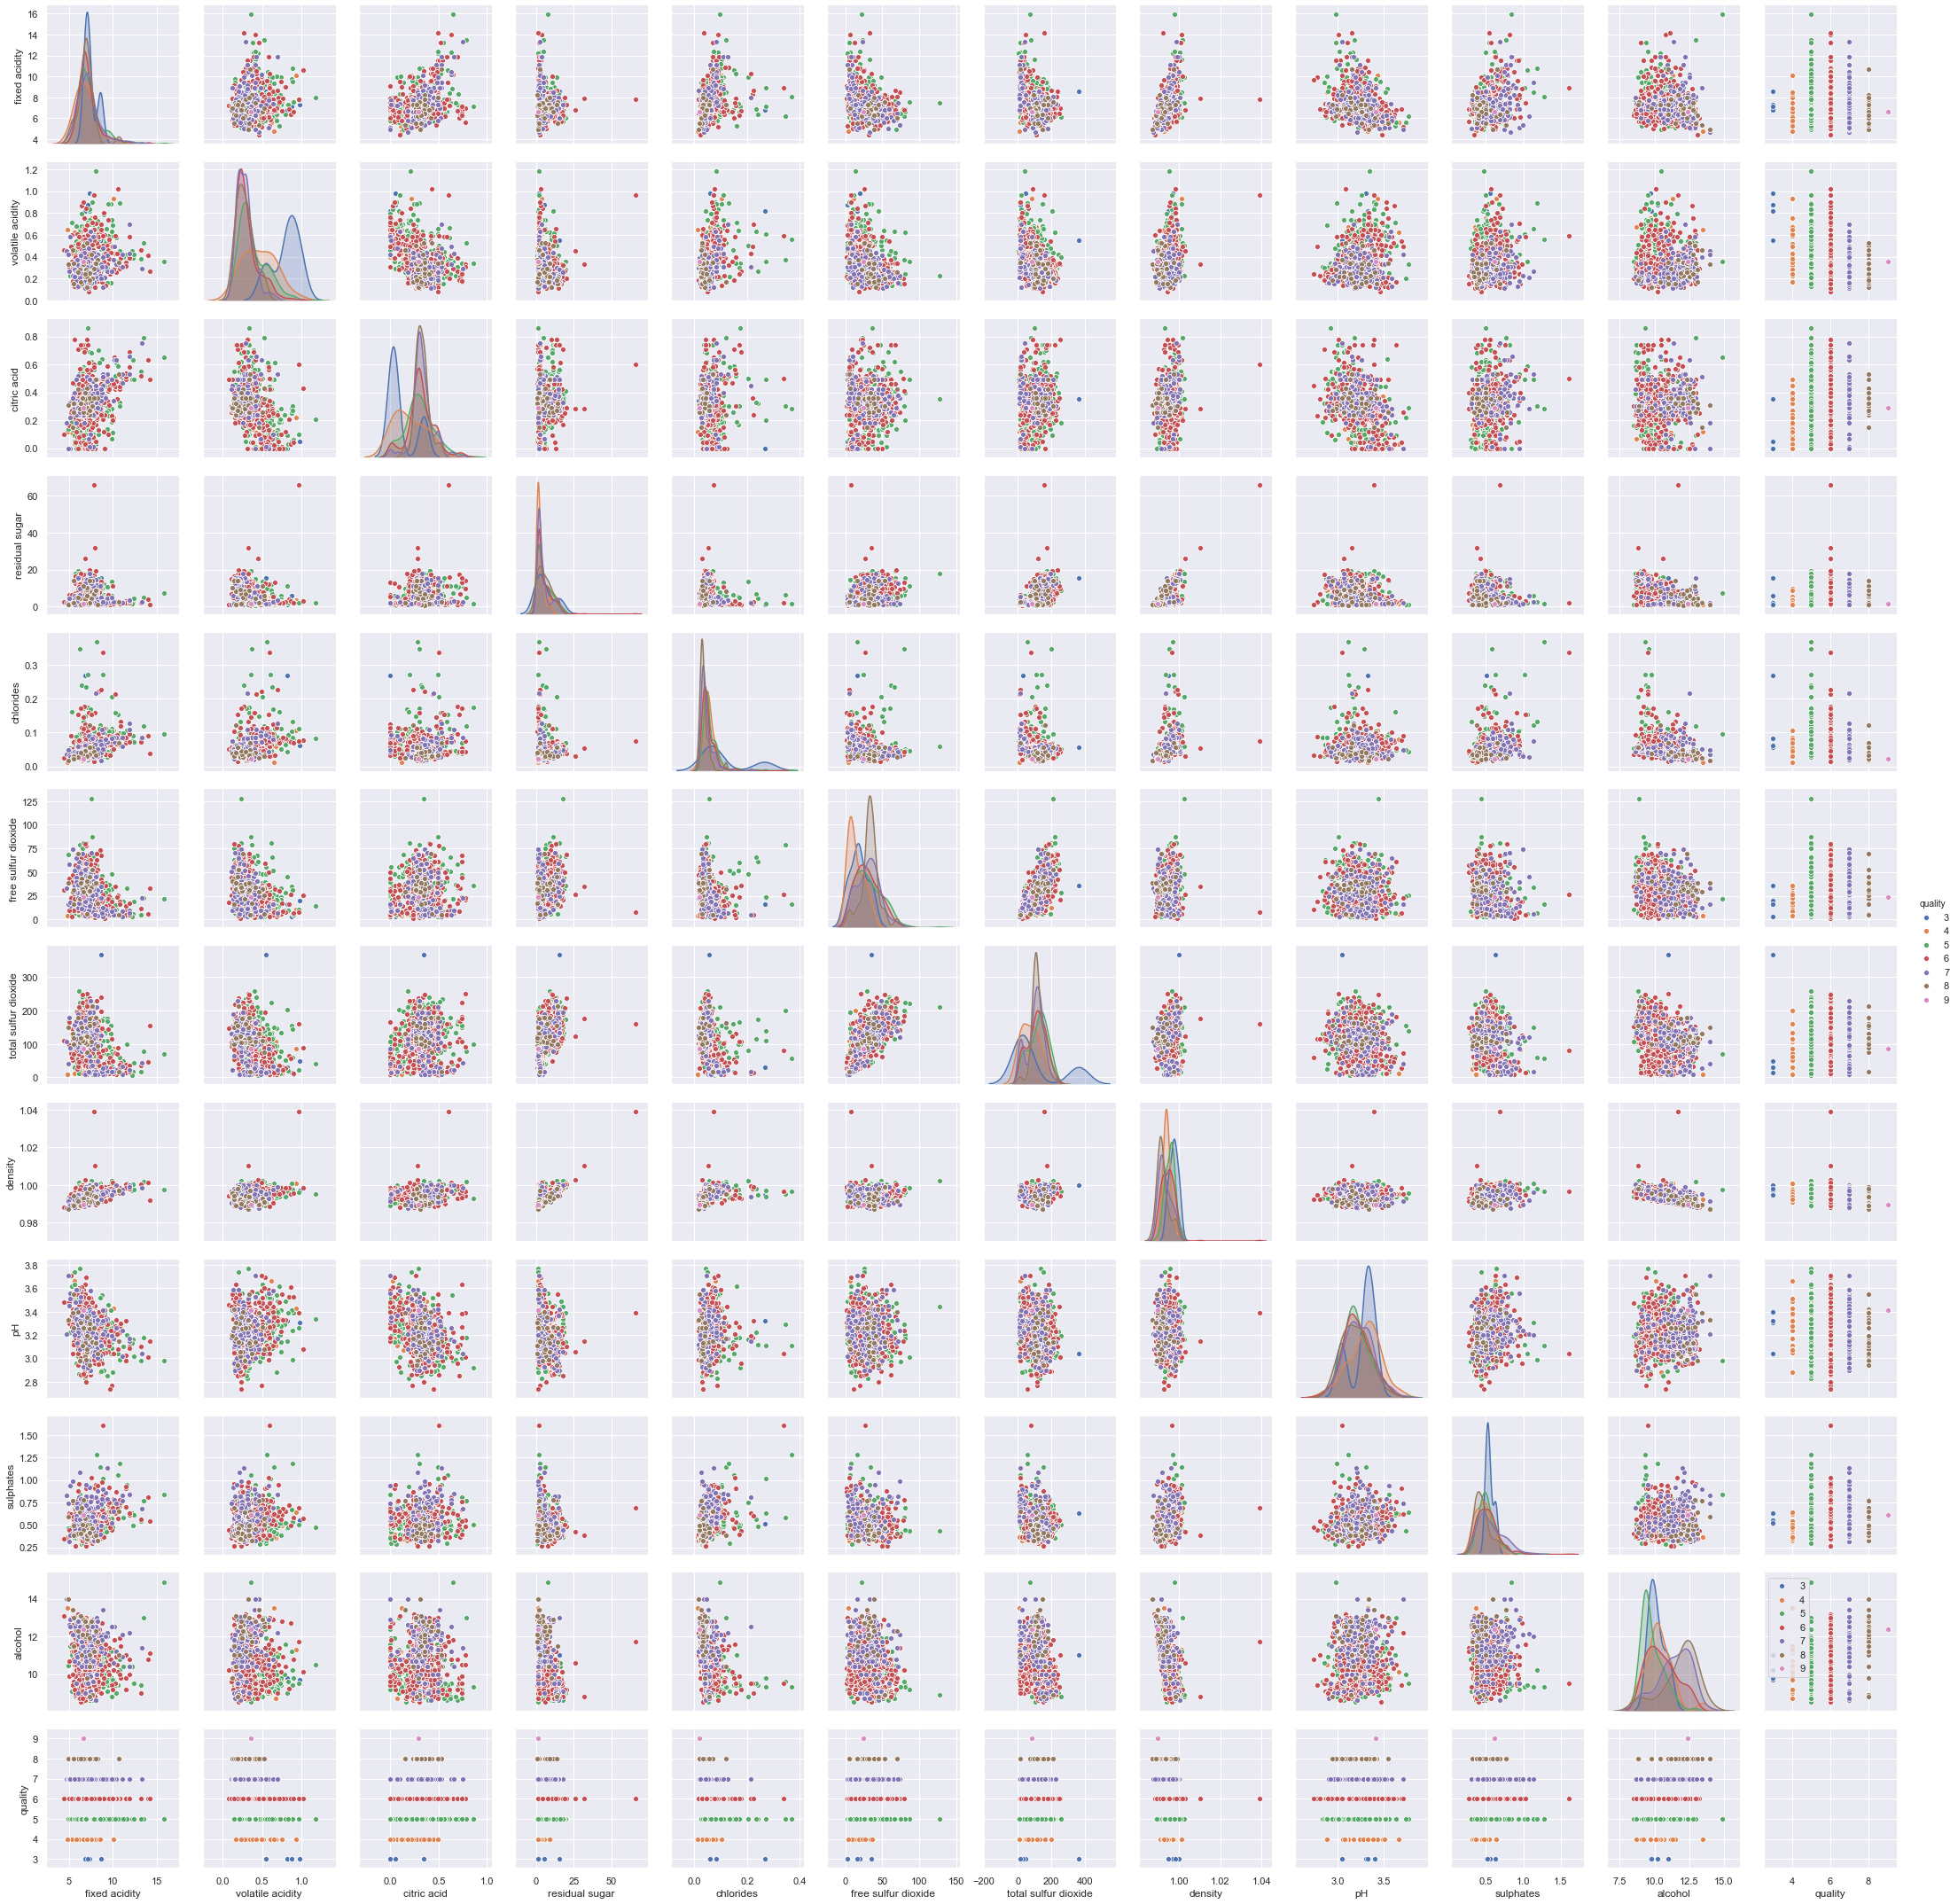

In [23]:
# Each wine type, plotting check of whole data, sample=1000.
sns.pairplot(df.sample(n=1000, random_state=10), hue="quality", hue_order=[3,4,5,6,7,8,9])
plt.legend()

«летучая кислотность», «лимонная кислота», «свободный диоксид серы», «плотность», «pH», «алкоголь» могут быть важны для качества вина.
### Затем проверим корреляцию

### 2.4.4 Корреляция

Text(111.453125, 0.5, 'Variables')

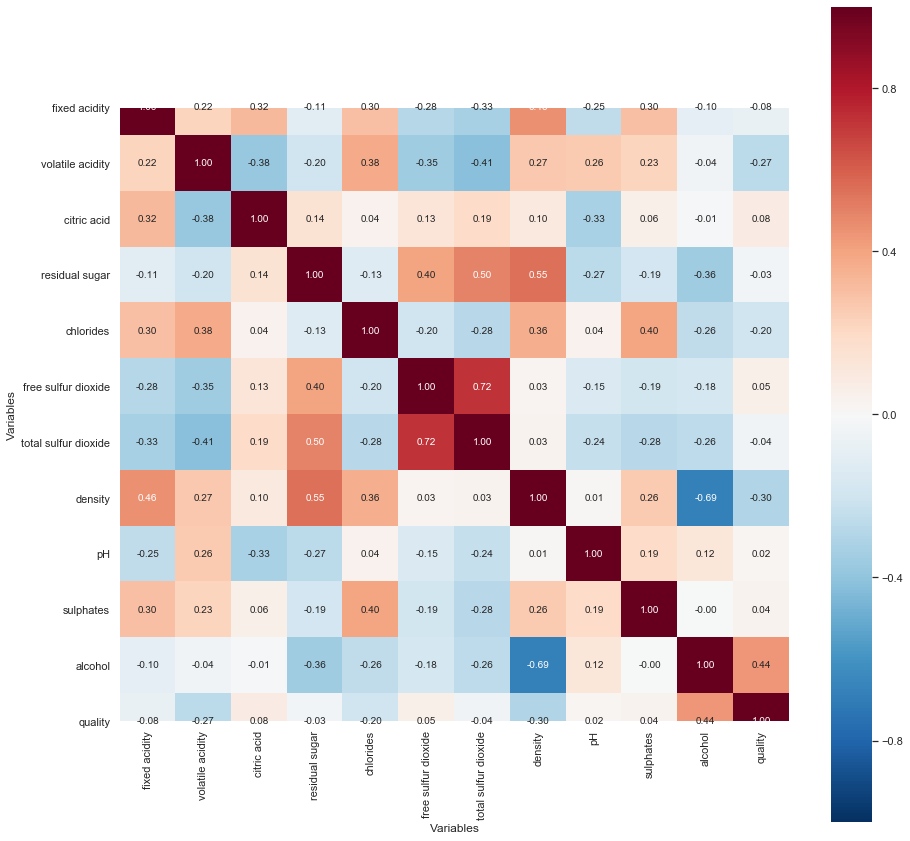

In [24]:
corr_values = df.iloc[:,1:]

# Heatmap
plt.figure(figsize=(15,15))
hm = sns.heatmap(corr_values.corr(),
                cbar=True,
                annot=True,
                square=True,
                cmap="RdBu_r",
                fmt=".2f",
                annot_kws={"size":10},
                yticklabels=corr_values.columns,
                vmax=1,
                vmin=-1,
                center=0)
plt.xlabel("Variables")
plt.ylabel("Variables")

«свободный диоксид серы» и «общий диоксид серы» имеют положительную корреляцию, а «плотность» и алкоголь имеют отрицательную корреляцию.

# 3. Data Preparation

## 3.1 Группировка по качеству - определение итогового класса предикта

In [41]:
def quality_flag(x):
    if x["quality"] >= 7:
        res = 1
    else:
        res = 0
    return res

df["quality_flg"] = df.apply(quality_flag, axis=1)
df["quality_flg"].value_counts()

0    5192
1    1271
Name: quality_flg, dtype: int64

## 3.2 Сборка финальных датасетов для моделирования

In [45]:
# Data preparing
X = df.iloc[:,1:12]
y = df["quality_flg"]

# Data splitting to make the training data and validation data
# training data :70%, validation(test data) :30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Taking veryfing to Standarlized data
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 4. Моделирование

## 4.1 Лог регрессия

In [46]:
# Logistic Regression
lr = LogisticRegression()

param_range = [0.001, 0.01, 0.1, 1.0]
penalty = ['l1', 'l2']
param_grid = [{"C":param_range, "penalty":penalty}]

gs_lr = GridSearchCV(estimator=lr, param_grid=param_grid, scoring="accuracy", cv=10, n_jobs=-1)
gs_lr = gs_lr.fit(X_train_std, y_train)

print(gs_lr.best_score_.round(3))
print(gs_lr.best_params_)

0.819
{'C': 1.0, 'penalty': 'l2'}


## 4.2 Дерево решений

In [47]:
# Decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=10)

param_range = [3, 6, 9, 12]
leaf = [10, 15, 20]
criterion = ["entropy", "gini", "error"]
param_grid = [{"max_depth":param_range, "criterion":criterion, "max_leaf_nodes":leaf}]

gs_tree = GridSearchCV(estimator=tree, param_grid=param_grid, scoring="accuracy", cv=10, n_jobs=-1)
gs_tree = gs_tree.fit(X_train, y_train)

print(gs_tree.best_score_.round(3))
print(gs_tree.best_params_)

0.824
{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20}


# 5. Оценка

In [48]:
print("-"*50)
# Logistic Regression Result
y_pred = gs_lr.best_estimator_.predict(X_test_std)
print("Logistic Regression Result")
print("confusion_matrix = \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("accuracy = %.3f" % accuracy_score(y_true=y_test, y_pred=y_pred))
print("precision = %.3f" % precision_score(y_true=y_test, y_pred=y_pred))
print("recall = %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("f1_score = %.3f" % f1_score(y_true=y_test, y_pred=y_pred))
print("-"*50)

# Decision tree
y_pred = gs_tree.best_estimator_.predict(X_test)
print("Decision tree")
print("confusion_matrix = \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("accuracy = %.3f" % accuracy_score(y_true=y_test, y_pred=y_pred))
print("precision = %.3f" % precision_score(y_true=y_test, y_pred=y_pred))
print("recall = %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("f1_score = %.3f" % f1_score(y_true=y_test, y_pred=y_pred))
print("-"*50)

--------------------------------------------------
Logistic Regression Result
confusion_matrix = 
 [[1489   79]
 [ 281   90]]
accuracy = 0.814
precision = 0.533
recall = 0.243
f1_score = 0.333
--------------------------------------------------
Decision tree
confusion_matrix = 
 [[1425  143]
 [ 196  175]]
accuracy = 0.825
precision = 0.550
recall = 0.472
f1_score = 0.508
--------------------------------------------------


### Правильно сделать разные модели для красного\белого. Но это в данном случае опущу - уель другая

# 6. Развертывание


In [55]:
y_pred = gs_tree.best_estimator_.predict(X_test)
y_pred = pd.DataFrame(y_pred)
df['y_pred'] = y_pred
df.to_csv( 'pred.csv' , index = False )

In [59]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


Взято от сюда https://www.kaggle.com/urayukitaka/wine-quality-study

In [71]:
# To have it formatted to black default length 88.
%%black 



UsageError: Line magic function `%%black` not found.
